In [1]:
from importlib import reload

In [3]:
import numpy as np
import os
#os.chdir('..')
import graphs
import ep_utils
import networkx as nx

In [108]:
reload(graphs)

<module 'graphs' from '/Users/josephhenderson/Desktop/Research/EquitablePartitions/graphs.py'>

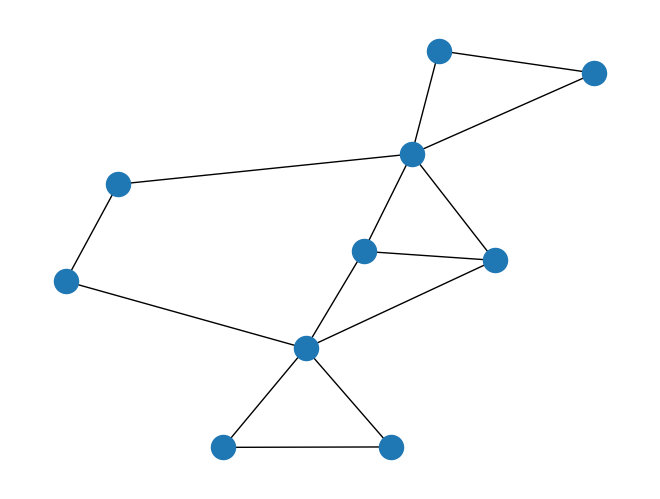

In [84]:
# get the modified dogbone and visualize
mod_dog = graphs.getModDogbone()
nx.draw(mod_dog)

In [3]:
#graphs.NetworkxToMathematica(mod_dog)

In [88]:
ep,lep = ep_utils.getEquitablePartitions(mod_dog)

COMPUTING LEPS...  |████████████████████████████████████████| 10/10 [100%] in 0.0s (28179.73/s) 


In [100]:
mod_dog_div = nx.to_numpy_array(graphs.genDivGraph(mod_dog,ep))

In [110]:
S = graphs.getCharacteristicMatrix(ep)

In [115]:
globs = np.unique(S@mod_dog_div@S.T,axis=0).T
globs

array([[0., 1., 3.],
       [0., 1., 3.],
       [1., 0., 2.],
       [1., 0., 2.],
       [1., 0., 2.],
       [1., 0., 2.],
       [1., 0., 2.],
       [1., 0., 2.],
       [2., 1., 0.],
       [2., 1., 0.]])

In [116]:
mod_dog_arr@globs

array([[7., 2., 6.],
       [7., 2., 6.],
       [1., 1., 5.],
       [1., 1., 5.],
       [1., 1., 5.],
       [1., 1., 5.],
       [1., 1., 5.],
       [1., 1., 5.],
       [2., 3., 6.],
       [2., 3., 6.]])

In [86]:
# make it a numpy array and get the eigenvalues and eigenvectors
mod_dog_arr = nx.to_numpy_array(mod_dog)
vals,vecs = np.linalg.eig(mod_dog_arr)

# make the eigenvectors orthonormalized
#ortho_vecs = graphs.gram_schmidt(vecs)

In [89]:
# check the spectral decomposition really sums to the original matrix
new = np.zeros(mod_dog_arr.shape)

for i,val in enumerate(vals):        
    vec /= np.linalg.norm(ortho_vecs[:,i])
    print(np.linalg.norm(vec))
    component = val*vec.reshape(-1,1)@vec.reshape(1,-1)
    print(f"component for eigval {val} is:\n{np.round(component,2)[2:,2:]}\n\n")
    new += component
    
np.allclose(new,mod_dog_arr)

1.0
component for eigval 3.192582403567256 is:
[[ 0.   -0.    0.    0.   -0.    0.   -0.    0.  ]
 [-0.    1.36 -0.55 -0.    0.55 -1.36  0.15 -0.15]
 [ 0.   -0.55  0.23  0.   -0.23  0.55 -0.06  0.06]
 [ 0.   -0.    0.    0.   -0.    0.   -0.    0.  ]
 [-0.    0.55 -0.23 -0.    0.23 -0.55  0.06 -0.06]
 [ 0.   -1.36  0.55  0.   -0.55  1.36 -0.15  0.15]
 [-0.    0.15 -0.06 -0.    0.06 -0.15  0.02 -0.02]
 [ 0.   -0.15  0.06  0.   -0.06  0.15 -0.02  0.02]]


1.0
component for eigval 2.114907541476757 is:
[[ 0.   -0.    0.    0.   -0.    0.   -0.    0.  ]
 [-0.    0.9  -0.37 -0.    0.37 -0.9   0.1  -0.1 ]
 [ 0.   -0.37  0.15  0.   -0.15  0.37 -0.04  0.04]
 [ 0.   -0.    0.    0.   -0.    0.   -0.    0.  ]
 [-0.    0.37 -0.15 -0.    0.15 -0.37  0.04 -0.04]
 [ 0.   -0.9   0.37  0.   -0.37  0.9  -0.1   0.1 ]
 [-0.    0.1  -0.04 -0.    0.04 -0.1   0.01 -0.01]
 [ 0.   -0.1   0.04  0.   -0.04  0.1  -0.01  0.01]]


1.0000000000000002
component for eigval -0.25410168836505276 is:
[[-0.    0.   -0.  

False

In [8]:
vals,vecs = np.linalg.eig(mod_dog_arr)

In [9]:
# check the spectral decomposition really sums to the original matrix
new = np.zeros(mod_dog_arr.shape)

for i,val in enumerate(vals):
    new += val*vecs[:,i].reshape(-1,1)@vecs[:,i].reshape(1,-1)
    
np.allclose(new,mod_dog_arr)

False

In [11]:
np.round(new,2)

array([[-0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  , -0.  ,  1.  ,
         1.  ],
       [ 0.  ,  0.  , -0.  ,  1.  ,  0.  ,  1.  , -0.  ,  1.  ,  1.  ,
         1.  ],
       [ 1.  , -0.  ,  0.16, -0.05, -0.05,  1.16, -0.05, -0.05, -0.03,
        -0.03],
       [ 0.  ,  1.  , -0.05, -0.13, -0.02, -0.05, -0.08,  1.03, -0.17,
         0.32],
       [ 1.  ,  0.  , -0.05, -0.02, -0.22, -0.05,  1.11, -0.08, -0.06,
         0.21],
       [ 0.  ,  1.  ,  1.16, -0.05, -0.05,  0.16, -0.05, -0.05, -0.03,
        -0.03],
       [ 1.  , -0.  , -0.05, -0.08,  1.11, -0.05, -0.22, -0.02,  0.21,
        -0.06],
       [-0.  ,  1.  , -0.05,  1.03, -0.08, -0.05, -0.02, -0.13,  0.32,
        -0.17],
       [ 1.  ,  1.  , -0.03, -0.17, -0.06, -0.03,  0.21,  0.32,  0.19,
         0.7 ],
       [ 1.  ,  1.  , -0.03,  0.32,  0.21, -0.03, -0.06, -0.17,  0.7 ,
         0.19]])

In [44]:
dog = graphs.getDogbone()

In [45]:
vals,vecs = np.linalg.eig(nx.to_numpy_array(dog))

In [46]:
ep,lep = ep_utils.getEquitablePartitions(dog)

COMPUTING LEPS...  |████████████████████████████████████████| 7/7 [100%] in 0.0s (28287.06/s) 


In [48]:
np.round(vecs,1)

array([[-0.4,  0.6, -0.4, -0.4,  0.4,  0. ,  0. ,  0. ],
       [ 0.4,  0.6,  0.4, -0.4, -0.4,  0. , -0. ,  0. ],
       [ 0.5, -0.2, -0.5, -0.3,  0.1,  0. , -0.6,  0. ],
       [-0.2, -0.2, -0.3, -0.3, -0.4, -0.2,  0.3, -0.7],
       [ 0.2, -0.2,  0.3, -0.3,  0.4, -0.7,  0.3, -0. ],
       [-0.5, -0.2,  0.5, -0.3, -0.1, -0. , -0.6, -0. ],
       [ 0.2, -0.2,  0.3, -0.3,  0.4,  0.7,  0.3,  0. ],
       [-0.2, -0.2, -0.3, -0.3, -0.4,  0.2,  0.3,  0.7]])

In [47]:
graphs.gl_identification(vecs,ep)

array([1., 0., 1., 0., 1., 1., 1., 1.])